In [ ]:
!wget https://faculty.nps.edu/sebuttre/Clemjars/Data%20Sets/att_faces.zip -O att_faces.zip
!unzip att_faces.zip

--2023-12-11 17:14:42--  https://faculty.nps.edu/sebuttre/Clemjars/Data%20Sets/att_faces.zip
Resolving faculty.nps.edu (faculty.nps.edu)... 205.155.65.15
Connecting to faculty.nps.edu (faculty.nps.edu)|205.155.65.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3769022 (3.6M) [application/x-zip-compressed]
Saving to: ‘att_faces.zip’

att_faces.zip       100%[===================>]   3.59M  2.86MB/s    in 1.3s    

2023-12-11 17:14:43 (2.86 MB/s) - ‘att_faces.zip’ saved [3769022/3769022]

Archive:  att_faces.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

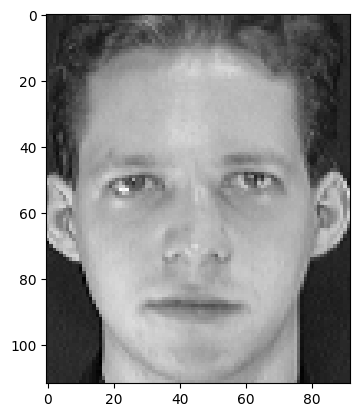

In [ ]:
import numpy as np
from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
img = imread('s1/1.pgm')
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')

<ipython-input-26-e4f2a1dedadb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  faces = faces.append(face)
<ipython-input-26-e4f2a1dedadb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  faces = faces.append(face)
<ipython-input-26-e4f2a1dedadb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  faces = faces.append(face)
<ipython-input-26-e4f2a1dedadb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  faces = faces.append(face)
<ipython-input-26-e4f2a1dedadb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  faces = faces.append(face)
<ipython-input-

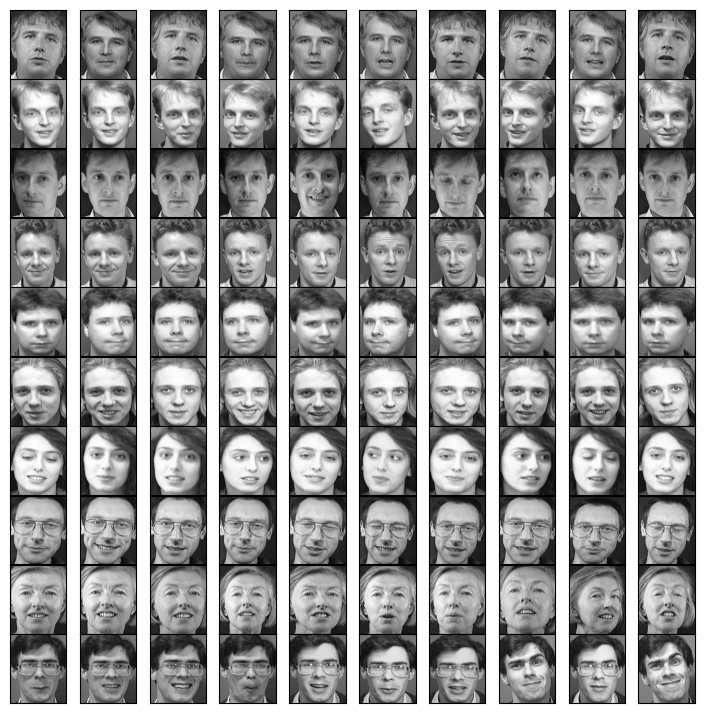

In [ ]:
import pandas as pd
from glob import iglob
faces = pd.DataFrame([])
for path in iglob('*/*.pgm'):
 img=imread(path)
 face = pd.Series(img.flatten(),name=path)
 faces = faces.append(face)

fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces.iloc[i].values.reshape(112,92),cmap='gray')

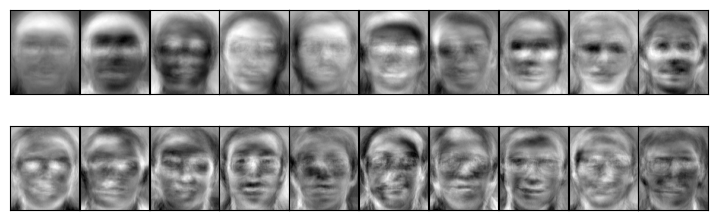

In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.99)
faces_pca.fit(faces)
fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(112,92),cmap='gray')

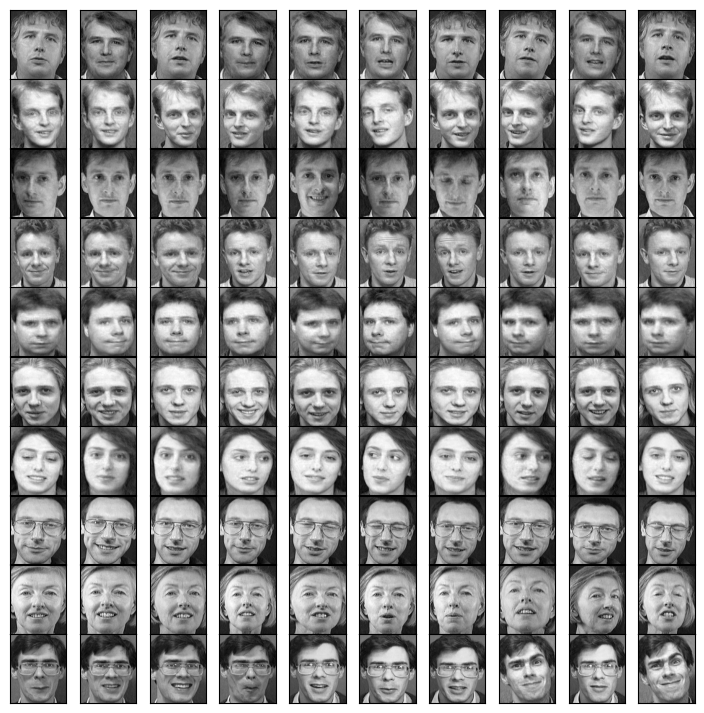

In [ ]:
components = faces_pca.transform(faces)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112,92),cmap="gray")